In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("dataR2.csv")

df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [5]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
#Memeriksa Jenis Data setiap Variabel
df.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [7]:
#Mengubah jenis data kategorikal pada variabel Classification
df["Classification"] = df["Classification"].astype('category')

df.dtypes

Age                  int64
BMI                float64
Glucose              int64
Insulin            float64
HOMA               float64
Leptin             float64
Adiponectin        float64
Resistin           float64
MCP.1              float64
Classification    category
dtype: object

In [8]:
#Memeriksa dimensi data
np.shape(df)

(116, 10)

In [9]:
#Memeriksa missing value setiap variabel
df.isnull().any()

Age               False
BMI               False
Glucose           False
Insulin           False
HOMA              False
Leptin            False
Adiponectin       False
Resistin          False
MCP.1             False
Classification    False
dtype: bool

In [216]:
#Transforming variabel prediktor dengan metode MinMaxScaler
from sklearn import preprocessing
transformasi_min_max=preprocessing.MinMaxScaler()

In [217]:
#Membagi data menjadi variabel target dan atribut
target = 'Classification'
x = df.drop('Classification', axis=1)
y =df[target]
nama_var_x=['Age','BMI','Glucose','Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
x = pd.DataFrame(data=transformasi_min_max.fit_transform(x), columns=nama_var_x)

In [218]:
x

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565
...,...,...,...,...,...,...,...,...,...
111,0.323077,0.419620,0.226950,0.016028,0.011727,0.585897,0.287049,0.098238,0.134568
112,0.584615,0.419125,0.283688,0.037446,0.026441,0.094674,0.543206,0.052098,0.172043
113,0.630769,0.676934,0.262411,0.058863,0.036757,0.664996,0.573988,0.090252,0.162294
114,0.738462,0.357271,0.156028,0.006925,0.004189,0.240191,0.882091,0.000761,0.209741


### **Data Eksplorasi**

In [219]:
#Melihat seberapa banyak nilai 1 dan 2 pada Variabel Classification
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

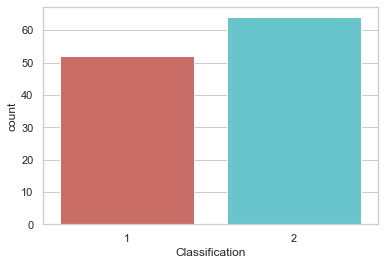

<Figure size 432x288 with 0 Axes>

In [220]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Classification',data=df,palette='hls')
plt.show()
plt.savefig('count_plot')  

In [221]:
#Membagi data menjadi data training dan data testing (80% Training dan 20% Testing)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

### **Regresi Logistik**

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [223]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.58


In [224]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5 1]
 [9 9]]


In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.83      0.50         6
           2       0.90      0.50      0.64        18

    accuracy                           0.58        24
   macro avg       0.63      0.67      0.57        24
weighted avg       0.76      0.58      0.61        24



### **Naive Bayes**

In [226]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [227]:
y_pred = gnb.predict(x_test)

In [228]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.28      0.83      0.42         6
           2       0.83      0.28      0.42        18

    accuracy                           0.42        24
   macro avg       0.56      0.56      0.42        24
weighted avg       0.69      0.42      0.42        24



### **Decision Tree**

In [229]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [230]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7083333333333334


In [231]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.44      0.67      0.53         6
           2       0.87      0.72      0.79        18

    accuracy                           0.71        24
   macro avg       0.66      0.69      0.66        24
weighted avg       0.76      0.71      0.72        24

